In [4]:
#Question-1
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
import numpy as np
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

symbols = get_nasdaq_symbols()[:]

list_all_public_traded = symbols.loc[:, ['Security Name', 'Listing Exchange']]

listing_exchange = {'A': 'NYSE MKT', 
                    'N': 'New York Stock Exchange (NYSE)',
                    'P': 'NYSE ARCA','Q': 'NASDAQ',
                    'V': 'Investors\' Exchange, LLC (IEXG)',
                    'Z': 'BATS Global Markets (BATS)'
                    }

list_all_public_traded['Listing Exchange'] = list_all_public_traded['Listing Exchange'].apply(lambda s: listing_exchange[s])
list_all_public_traded

,Security Name,Listing Exchange
Symbol,,
A,"Agilent Technologies, Inc. Common Stock",New York Stock Exchange (NYSE)
AA,Alcoa Corporation Common Stock,New York Stock Exchange (NYSE)
AAAP,Advanced Accelerator Applications S.A. - Ameri...,NASDAQ
AABA,Altaba Inc. - Common Stock,NASDAQ
AAC,"AAC Holdings, Inc. Common Stock",New York Stock Exchange (NYSE)
AADR,AdvisorShares Dorsey Wright ADR ETF,NYSE ARCA
AAL,"American Airlines Group, Inc. - Common Stock",NASDAQ
AAMC,Altisource Asset Management Corp Com,NYSE MKT
AAME,Atlantic American Corporation - Common Stock,NASDAQ


In [5]:
#Question-2
tickers = ['AAPL', 'GOOGL', 'AMZN', 'FB', 'MSFT']
data_source = 'yahoo'
start_date = '2016-01-01'
end_date = '2016-12-31'

try:
    panel_data = data.DataReader(tickers, data_source, start_date, end_date)
    close1 = panel_data.loc['Close']
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    close = close1.reindex(all_weekdays)
    close.fillna(0)
    print(close)
except Exception as inst:
    print("here:",type(inst))
    print("here1",inst.args)

                  AAPL        AMZN          FB       GOOGL       MSFT
2016-01-01         NaN         NaN         NaN         NaN        NaN
2016-01-04  105.349998  636.989990  102.220001  759.440002  54.799999
2016-01-05  102.709999  633.789978  102.730003  761.530029  55.049999
2016-01-06  100.699997  632.650024  102.970001  759.330017  54.049999
2016-01-07   96.449997  607.940002   97.919998  741.000000  52.169998
2016-01-08   96.959999  607.049988   97.330002  730.909973  52.330002
2016-01-11   98.529999  617.739990   97.510002  733.070007  52.299999
2016-01-12   99.959999  617.890015   99.370003  745.340027  52.779999
2016-01-13   97.389999  581.809998   95.440002  719.570007  51.639999
2016-01-14   99.519997  593.000000   98.370003  731.390015  53.110001
2016-01-15   97.129997  570.179993   94.970001  710.489990  50.990002
2016-01-18         NaN         NaN         NaN         NaN        NaN
2016-01-19   96.660004  574.479980   95.260002  719.080017  50.560001
2016-01-20   96.7900

In [6]:
#Question-3:Relative Returns
first_value = close.iloc[1].tolist() # Value of security in begining of the year 2016
last_value = close.iloc[-1].tolist() # Value of security in end of the year 2016

#convert into numpy array
first_as_np = np.asarray(first_value)
last_as_np = np.asarray(last_value)


#relative returns
relative_return = (last_as_np-first_as_np)/(first_as_np)

#Set in dataframe
d = {' Symbols ': tickers, ' Relative Return ':relative_return}
rel_return_data = pd.DataFrame(data=d)
print(rel_return_data)

    Relative Return   Symbols 
0           0.099383      AAPL
1           0.177208     GOOGL
2           0.125514      AMZN
3           0.043466        FB
4           0.133942      MSFT


In [7]:
##Question-3:min, max and volume
min_list = []
max_list = []
mean_list = []
close_without_nan = close.dropna() # Remove all NAN values
def myfunc(t):
    AAPL_List = close_without_nan[t].tolist()
    big_array = np.asarray(AAPL_List)
    min_a = min(big_array)
    max_a = max(big_array)
    min_list.append(min_a)
    max_list.append(max_a)
    mean1 =  np.mean(big_array)
    mean_list.append(mean1)
    return 0
    
vfunc = np.frompyfunc(myfunc,1,1) #I was getting 1st value two time that's why I use frompyfunc instead of Vectorization.
min_max = vfunc(tickers)
d = {' Symbols ': tickers, ' min ':min_list, ' max ': max_list}
min_max = pd.DataFrame(data=d)
print(min_max)

#Volume for each security
print('\nVolume for each company:')
v = panel_data['Volume']
print(v)

   Symbols         max         min 
0      AAPL  118.250000   90.339996
1     GOOGL  835.739990  681.140015
2      AMZN  844.359985  482.070007
3        FB  133.279999   94.160004
4      MSFT   63.619999   48.430000

Volume for each company:
                   AAPL        AMZN           FB      GOOGL        MSFT
Date                                                                   
2016-12-30   30586300.0   4139400.0   18684100.0  1735900.0  25579900.0
2016-12-29   15039500.0   3153500.0    9921400.0  1056500.0  10181600.0
2016-12-28   20905900.0   3301000.0   12087400.0  1214800.0  14653300.0
2016-12-27   18296900.0   2638700.0   12051500.0   976000.0  11763200.0
2016-12-23   14181200.0   1976900.0   10877300.0   764100.0  12398000.0
2016-12-22   26085900.0   2543600.0   16258600.0  1131600.0  22176600.0
2016-12-21   23783200.0   2044600.0   10767600.0  1459600.0  17096300.0
2016-12-20   21425000.0   2703600.0   13684400.0  1271900.0  26028400.0
2016-12-19   27779400.0   3113200.0   

C:\Users\KVRx\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


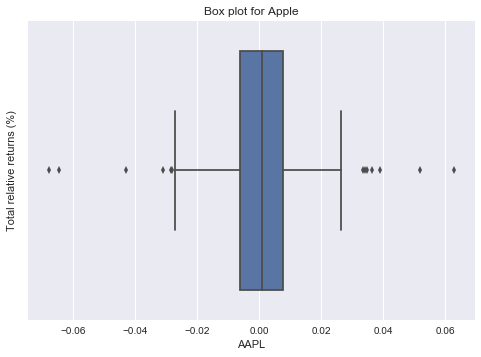

In [12]:
#Question :3
import seaborn as sbn
log_returns = np.log(close).diff()

log_returns.head()
aapl_amzn_dict = { 'AAPL': log_returns.AAPL, 'AMZN': log_returns.AMZN }
AAPL_AMZN_log_returns = pd.DataFrame.from_dict(aapl_amzn_dict)

box = sbn.boxplot(x='AAPL', data=AAPL_AMZN_log_returns)
box.set_title('Box plot for Apple')
box.set_ylabel('Total relative returns (%)')

plt.show()


C:\Users\KVRx\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


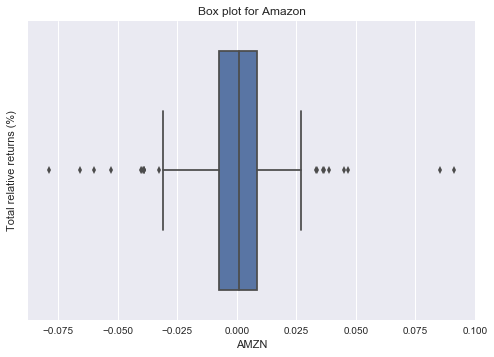

In [13]:
box = sbn.boxplot(x='AMZN', data=AAPL_AMZN_log_returns)
box.set_title('Box plot for Amazon')
box.set_ylabel('Total relative returns (%)')

plt.show()

In [121]:
# Question-4:   
# Here I am taking Google and Amazon
import math
total_invested_amount = 10000

# Here, I do not have much knowledge about stock data. Thus, assuming, we can not buy stocks in fractions.  
AMZN_begin_2016 = close_without_nan.AMZN[0] * 12 #7680.86
GOOGL_begin_2016 = close_without_nan.GOOGL[0] * 3 #2278.32
left_over_amount_from_10k = total_invested_amount - (AMZN_begin_2016 + GOOGL_begin_2016) #77.800114

AMZN_end_2016 = close_without_nan.AMZN[-1] * 12
GOOGL_end_2016 = close_without_nan.GOOGL[-1] * 3

amzn_rela_return = (AMZN_end_2016 - AMZN_begin_2016)
google_rela_return = (GOOGL_end_2016 - GOOGL_begin_2016)

total_relative_return = (amzn_rela_return+google_rela_return)/total_invested_amount
print("Total relative return of Amazon and Google : ",total_relative_return) 
print("Total income :", amzn_rela_return+google_rela_return)

Total relative return of Amazon and Google :  0.145359009
Total income : 1453.59009


In [120]:
# Question-5: Amazon, Google and Apple
# Note: As I mentioned above we can not buy shares in fractions so, I have tried to invest maximum amount according to percentages.
total_invested_amount = 10000
AMZN_begin_2016 = close_without_nan.AMZN[0] * 6     #3821.94    0.11741700000000005
GOOGL_begin_2016 = close_without_nan.GOOGL[0] * 3   #2278.32
AAPL_begin_2016 = close_without_nan.AAPL[0] * 38    #4003.3

AMZN_end_2016 = close_without_nan.AMZN[-1] * 6
GOOGL_end_2016 = close_without_nan.GOOGL[-1] * 3
AAPL_end_2016 = close_without_nan.AAPL[-1] * 38

apple_relative_return = (AAPL_end_2016 - AAPL_begin_2016)
amzn_relative_return = (AMZN_end_2016 - AMZN_begin_2016)
google_relative_return = (GOOGL_end_2016 - GOOGL_begin_2016)

total_relative_return = apple_relative_return + amzn_relative_return + google_relative_return
print("Total relative return :", total_relative_return/total_invested_amount)
print("Total income :", total_relative_return)

Total relative return : 0.1174170136
Total income : 1174.170136
